In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data_dir = Path("Data")
braemar_dir = Path(data_dir, "Braemar.txt")
heathrow_dir = Path(data_dir, "Heathrow.txt")

In [3]:
with open(braemar_dir) as f:
    braemar = f.readlines()

In [4]:
header = braemar[0].strip()
braemar = braemar[2:]

In [5]:
def clean_text(input_text:str) -> list[str]:
    split_text = input_text.split(" ")
    newlines_removed = [x.replace("\n", "").replace("Provisional", "") for x in split_text]
    return [x for x in newlines_removed if len(x) > 0]

# Braemar

In [6]:
header = clean_text(header)
braemar_clean = [clean_text(x) for x in braemar]
braemar_df = pd.DataFrame(braemar_clean, columns = header)

In [7]:
braemar_df = braemar_df.replace("---", np.nan)

In [8]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   yyyy    770 non-null    object
 1   mm      770 non-null    object
 2   tmax    766 non-null    object
 3   tmin    766 non-null    object
 4   af      766 non-null    object
 5   rain    743 non-null    object
 6   sun     552 non-null    object
dtypes: object(7)
memory usage: 42.2+ KB


In [9]:
braemar_df['tmin'] = braemar_df['tmin'].str.replace("*","", regex=False)
braemar_df['tmax'] = braemar_df['tmax'].str.replace("*","", regex=False)
braemar_df['af'] = braemar_df['af'].str.replace("*","", regex=False)
braemar_df['rain'] = braemar_df['rain'].str.replace("*","", regex=False)
braemar_df['sun'] = braemar_df['sun'].str.replace("*","", regex=False)

In [10]:
braemar_df = braemar_df.astype({"yyyy":int, "mm":int, "tmin":float, "tmax":float, 
                                "af":float, "rain":float, "sun":float})

In [11]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    int64  
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 42.2 KB


In [12]:
braemar_df['mm'] = braemar_df['mm'].map(
    {1: "Jan", 
     2:"Feb", 
     3:"Mar",
     4:"Apr",
     5:"May",
     6:"June",
     7:"July",
     8:"Aug",
     9:"Sep",
     10:"Oct",
     11:"Nov",
     12:"Dec"})

In [13]:
braemar_df.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
765,2022,Oct,12.4,6.4,2.0,103.8,NaN
766,2022,Nov,9.2,2.7,7.0,171.8,NaN
767,2022,Dec,3.1,-3.1,22.0,64.0,NaN
768,2023,Jan,5.1,-1.3,17.0,77.2,NaN
769,2023,Feb,7.6,1.3,7.0,43.2,NaN


/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/1459334317.py:2: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/1459334317.py:18: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,


Text(0.5, 1.0, 'Braemar Min and Max Temperature from 1959 - 2023')

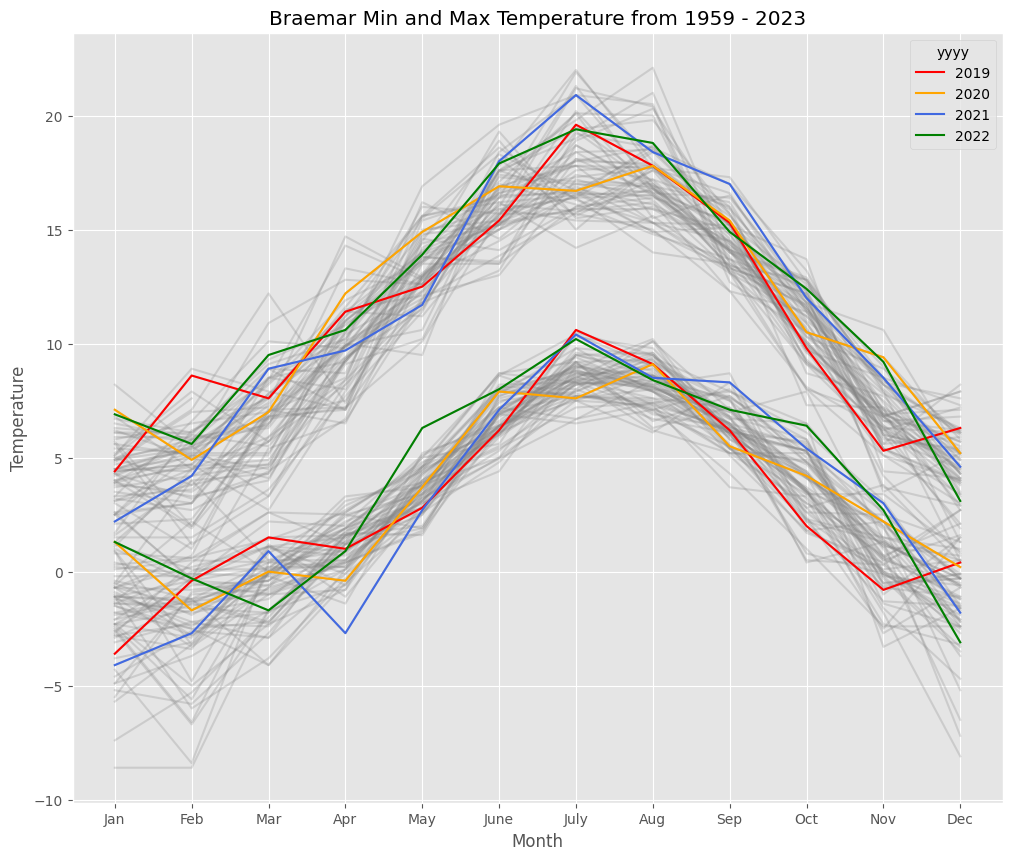

In [14]:
fig, ax = plt.subplots(figsize = (12,10))
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['red', 'orange', 'royalblue', 'green'],
             ax = ax)

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin([2022, 2021, 2020,2019])], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= ['red', 'orange', 'royalblue', 'green'],
             ax = ax)

ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
ax.set_title("Braemar Min and Max Temperature from 1959 - 2023")

In [15]:
braemar_df.head(1)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1959,Jan,1.7,-5.7,27.0,NaN,34.2


In [16]:
braemar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    770 non-null    int64  
 1   mm      770 non-null    object 
 2   tmax    766 non-null    float64
 3   tmin    766 non-null    float64
 4   af      766 non-null    float64
 5   rain    743 non-null    float64
 6   sun     552 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 42.2+ KB


/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/2063734140.py:6: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/2063734140.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/2063734140.py:24: UserWarning: 
The palette list has fewer values (1) than needed (65) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = braemar_df,
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/2063734140.py:33: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn

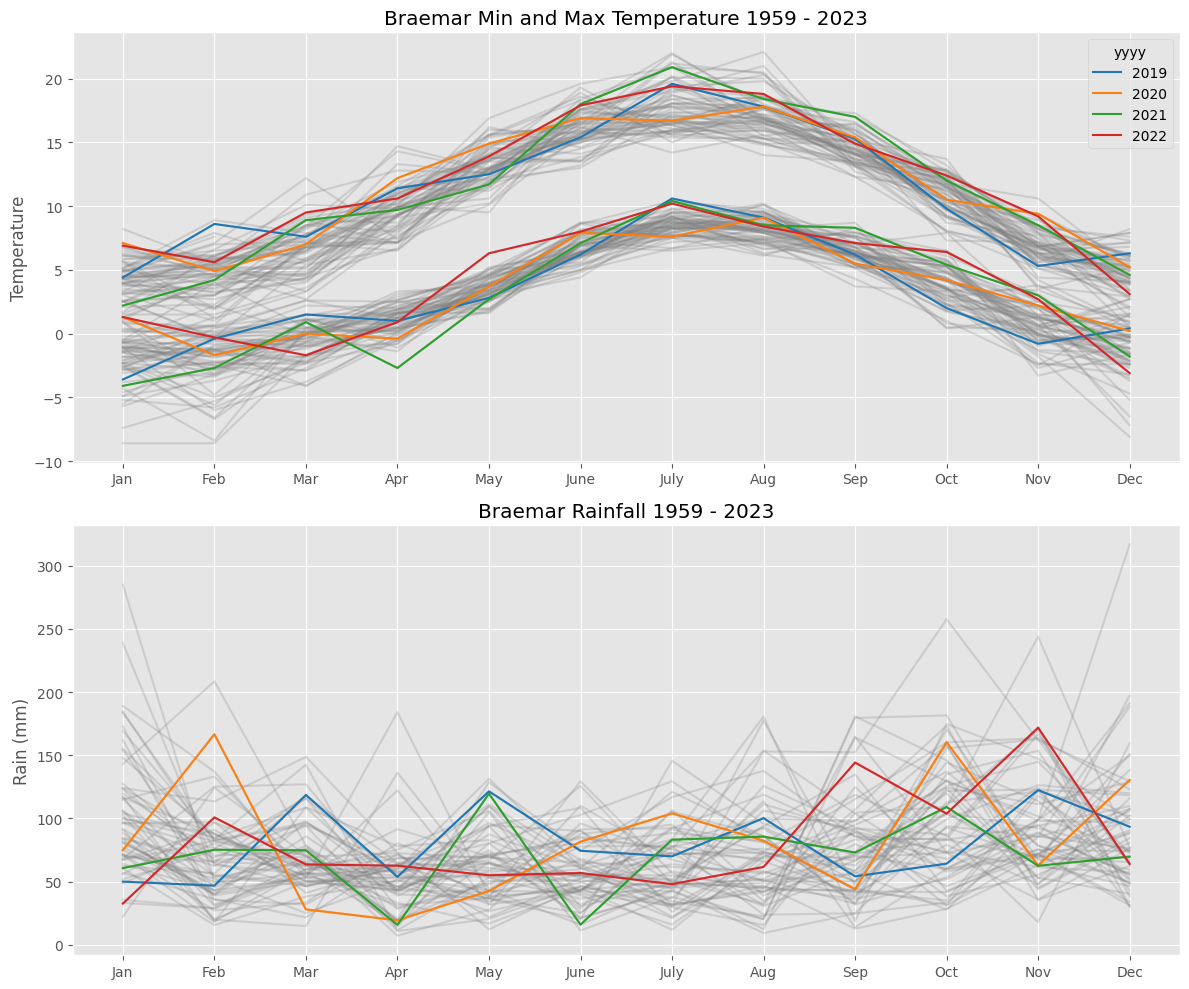

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize=(12, 10))

years = [2022,2021,2020,2019]
colours = sns.color_palette("tab10")
# tmax
sns.lineplot(data = braemar_df, 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= colours,
             ax = ax1)

#tmin

sns.lineplot(data = braemar_df, 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax1)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= colours,
             ax = ax1)

#Rain

sns.lineplot(data = braemar_df, 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= ['gray'],
             legend = None, 
             alpha = 0.25, 
             ax = ax2)

sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'rain', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= colours,
             ax = ax2)


ax1.set_ylabel("Temperature")
ax1.set_xlabel("")
ax1.set_title("Braemar Min and Max Temperature 1959 - 2023")

ax2.set_ylabel("Rain (mm)")
ax2.set_xlabel("")
ax2.set_title("Braemar Rainfall 1959 - 2023")

plt.tight_layout()

In [18]:
monthly_avg_tmax = braemar_df.groupby('mm').mean()['tmax']
monthly_avg_tmin = braemar_df.groupby('mm').mean()['tmin']
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Doc"]
monthly_avg_tmax = monthly_avg_tmax.reindex(index = months)
monthly_avg_tmin = monthly_avg_tmin.reindex(index = months)

/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/1005942721.py:21: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],
/var/folders/v6/dbfxlq956gn5vzm_219g_zgw0000gn/T/ipykernel_2114/1005942721.py:27: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)],


Text(0.5, 1.0, 'Braemar Average Min and Max Temperature 1959 - 2023')

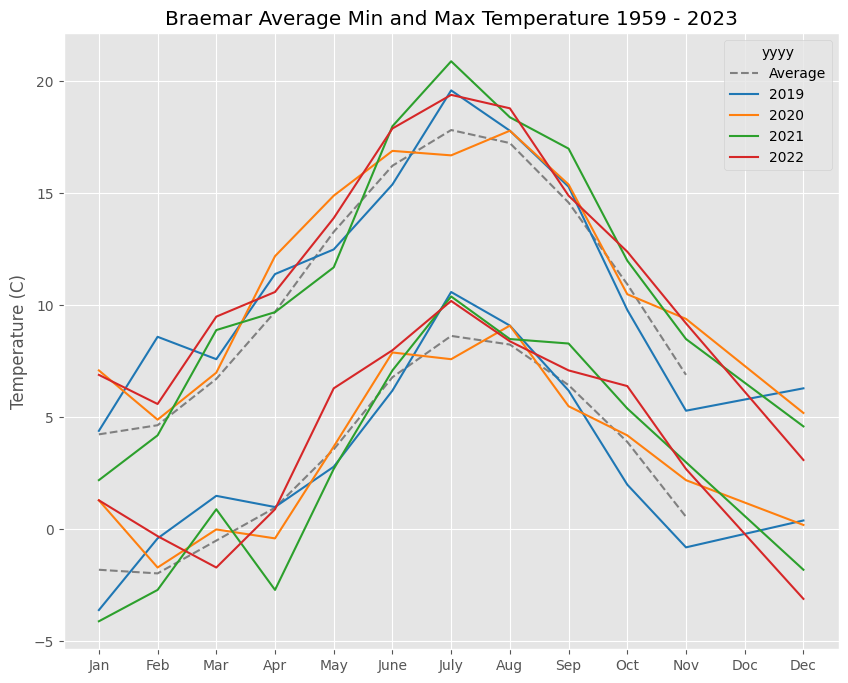

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
# Averages
sns.lineplot(data = monthly_avg_tmax, 
             y = monthly_avg_tmax.values,
             x = monthly_avg_tmax.index,
             color = 'grey',
             legend = None,
             label = 'Average',
             linestyle = "--",
             ax = ax,)

sns.lineplot(data = monthly_avg_tmax, 
             y = monthly_avg_tmin.values,
             x = monthly_avg_tmin.index,
             color = 'grey',
             legend = None, 
             linestyle = "--",
             ax = ax)

# Years
sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmax', 
             x = 'mm', 
             hue = 'yyyy', 
             palette= colours,
             ax = ax)
sns.lineplot(data = braemar_df[braemar_df['yyyy'].isin(years)], 
             y = 'tmin', 
             x = 'mm', 
             hue = 'yyyy', 
             legend = None,
             palette= colours,
             ax = ax)


ax.set_ylabel("Temperature (C)")
ax.set_xlabel("")
ax.set_title("Braemar Average Min and Max Temperature 1959 - 2023")

In [21]:
melted = braemar_df.melt(id_vars = 'mm', value_vars='tmax')

In [22]:
braemar_years_tmax = braemar_df[braemar_df['yyyy'].isin(years)][['yyyy','mm','tmax']]

In [51]:
"""
This cell basically just finds the highest temps for each month, then 
finds the corresponding year this occured. There has to be a better way
to compare multiple columns across dataframes but I cant find it. 
"""
braemar_df['concat'] = (braemar_df['mm'].astype(str) + 
" " + braemar_df['tmax'].astype(str))
max_by_month = braemar_df.groupby('mm', as_index = False).max()[['mm', 'tmax']]
max_by_month['concat'] = max_by_month['mm'].astype(str) + " " + max_by_month['tmax'].astype(str)
max_by_month_list = max_by_month['concat'].to_list()
braemar_max_temp_year_month_df = braemar_df[braemar_df['concat'].isin(max_by_month_list)][['yyyy','mm','tmax']]

Text(0.5, 1.0, 'Braemar Monthly Max Temperature Boxplots 1959 - 2023')

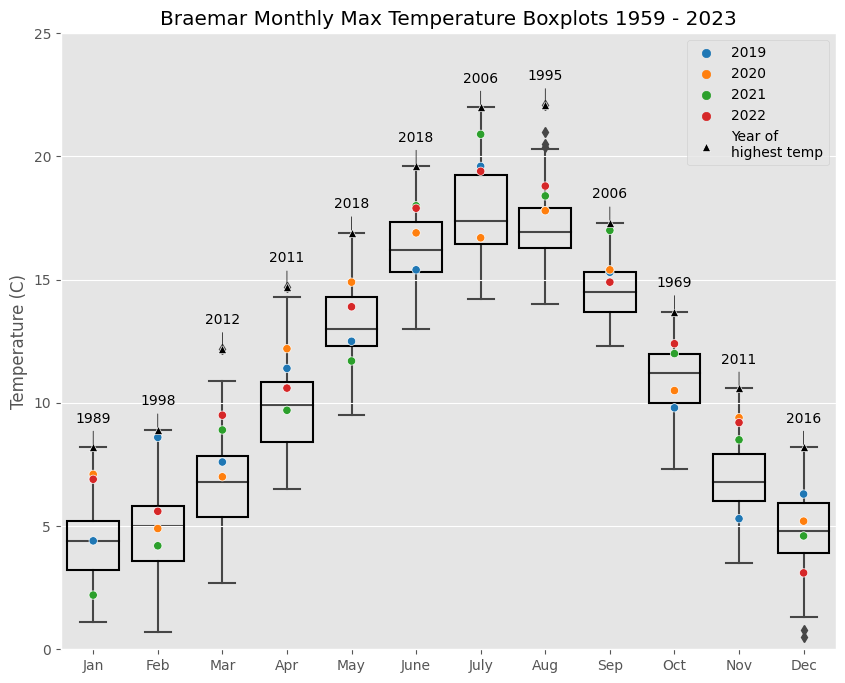

In [95]:
fig, ax = plt.subplots(figsize = (10,8))

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}

sns.boxplot(data = melted,
            x = 'mm', 
            y = 'value',
            ax = ax,
            zorder = 0,
            **PROPS)

sns.scatterplot(data = braemar_years_tmax, 
                x = 'mm', 
                hue = 'yyyy',
                y = 'tmax', 
                palette = 'tab10',
                zorder = 1)

sns.scatterplot(data = braemar_max_temp_year_month_df, 
                x = 'mm', 
                y = 'tmax', 
                color = 'black',
                label = 'Year of\nhighest temp',
                marker = "^",
                zorder = 1)

arrowprops=dict(arrowstyle="-",color = 'black',
                            connectionstyle="arc3")

for i in range(len(braemar_max_temp_year_month_df)):
    ax.annotate(text = braemar_max_temp_year_month_df.iloc[i]['yyyy'], 
                xy = (braemar_max_temp_year_month_df.iloc[i]['mm'], 
                    braemar_max_temp_year_month_df.iloc[i]['tmax']), 
                xytext = (braemar_max_temp_year_month_df.iloc[i]['mm'], 
                    braemar_max_temp_year_month_df.iloc[i]['tmax']+1),
                arrowprops=arrowprops,
                ha='center'
                )

ax.set_ylabel("Temperature (C)")
ax.set_ylim(0,25)
ax.set_xlabel("")
ax.set_title("Braemar Monthly Max Temperature Boxplots 1959 - 2023")

In [ ]:
melted = braemar_df.melt(id_vars = 'mm', value_vars='tmin')
braemar_years_tmin = braemar_df[braemar_df['yyyy'].isin(years)][['yyyy','mm','tmin']]

In [130]:
"""
This cell basically just finds the lowest temps for each month, then 
finds the corresponding year this occured. There has to be a better way
to compare multiple columns across dataframes but I cant find it. 
"""
braemar_df['concat'] = (braemar_df['mm'].astype(str) + 
" " + braemar_df['tmin'].astype(str))
min_by_month = braemar_df.groupby('mm', as_index = False).min()[['mm', 'tmin']]
min_by_month['concat'] = min_by_month['mm'].astype(str) + " " + min_by_month['tmin'].astype(str)
min_by_month_list = min_by_month['concat'].to_list()
braemar_min_temp_year_month_df = braemar_df[braemar_df['concat'].isin(min_by_month_list)][['yyyy','mm','tmin']]

Text(0.5, 1.0, 'Braemar Monthly Min Temperature Boxplots 1959 - 2023')

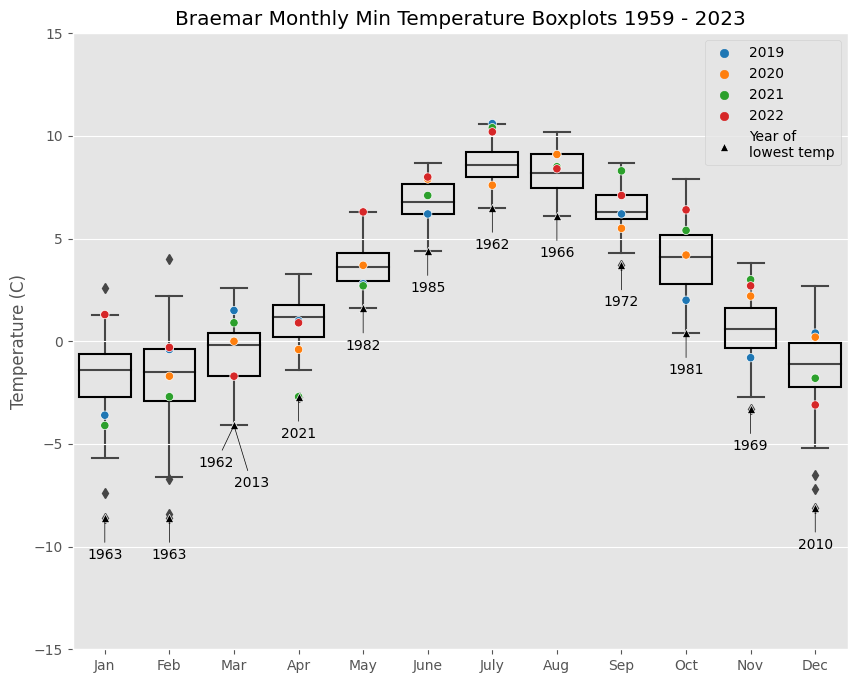

In [142]:
fig, ax = plt.subplots(figsize = (10,8))

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}

sns.boxplot(data = melted,
            x = 'mm', 
            y = 'value',
            ax = ax,
            zorder = 0,
            **PROPS)

sns.scatterplot(data = braemar_years_tmin, 
                x = 'mm', 
                hue = 'yyyy',
                y = 'tmin', 
                palette = 'tab10',
                zorder = 1)

sns.scatterplot(data = braemar_min_temp_year_month_df, 
                x = 'mm', 
                y = 'tmin', 
                color = 'black',
                label = 'Year of\nlowest temp',
                marker = "^",
                zorder = 1)

arrowprops=dict(arrowstyle="-",color = 'black',
                            connectionstyle="arc3")

for i in range(len(braemar_min_temp_year_month_df)):
    if braemar_min_temp_year_month_df.iloc[i]['mm'] == 'Mar':
        pass
    else:
        ax.annotate(text = braemar_min_temp_year_month_df.iloc[i]['yyyy'], 
                xy = (braemar_min_temp_year_month_df.iloc[i]['mm'], 
                    braemar_min_temp_year_month_df.iloc[i]['tmin']), 
                xytext = (braemar_min_temp_year_month_df.iloc[i]['mm'], 
                    braemar_min_temp_year_month_df.iloc[i]['tmin']-2),
                arrowprops=arrowprops,
                ha='center'
                )

# Mar has two years with a min of -4.1
mar_min_df = braemar_min_temp_year_month_df[braemar_min_temp_year_month_df['mm'] == 'Mar']

ax.annotate(text = mar_min_df.iloc[0]['yyyy'], 
            xy = (mar_min_df.iloc[0]['mm'], 
                    mar_min_df.iloc[0]['tmin']), 
            xytext = (mar_min_df.iloc[0]['mm'], 
                    mar_min_df.iloc[0]['tmin']-2),
            arrowprops=arrowprops,
            ha='right'
                )

ax.annotate(text = mar_min_df.iloc[1]['yyyy'], 
            xy = (mar_min_df.iloc[1]['mm'], 
                    mar_min_df.iloc[1]['tmin']), 
            xytext = (mar_min_df.iloc[1]['mm'], 
                    mar_min_df.iloc[1]['tmin']-3),
            arrowprops=arrowprops,
            ha='left'
                )

ax.set_ylabel("Temperature (C)")
ax.set_ylim(-15,15)
ax.set_xlabel("")
ax.set_title("Braemar Monthly Min Temperature Boxplots 1959 - 2023")

In [200]:
sun_months = ['Mar',
 'Feb',
 'Jan',
 'Doc',
 'Nov',
 'Oct',
 'Sep',
 'Aug',
 'July',
 'June',
 'May',
 'Apr',
 ]

braemar_sun_mean = braemar_df.groupby('mm', as_index = False).mean(numeric_only = True)[['mm', 'sun']]
braemar_sun_mean.index = braemar_sun_mean['mm']
braemar_sun_mean = braemar_sun_mean.reindex(sun_months).reset_index(drop = True).dropna()

Text(0.5, 1.0, 'Braemar Average Monthly Hours of Sun 1959 - 2023')

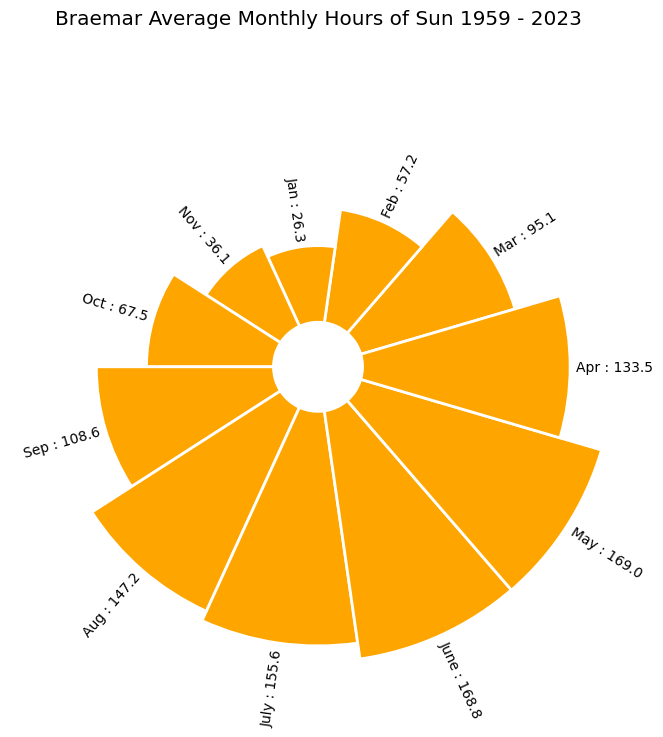

In [209]:
# set figure size
plt.figure(figsize=(16,8))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = braemar_sun_mean['sun'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * braemar_sun_mean['sun'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(braemar_sun_mean.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(braemar_sun_mean.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    color = 'orange', 
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label, value in zip(bars,angles, heights, braemar_sun_mean["mm"],
                                            braemar_sun_mean["sun"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label + " : " + str(round(value,1)), 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    

ax.set_title("Braemar Average Monthly Hours of Sun 1959 - 2023")